In [1]:
import numpy as np
import joblib
from AuNR_Automated_Analysis import Absorption_decon, Deconvolution_Output
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob 
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.stats as stats
import sys
from Input_Object_Creation import Input_Object, test_spectra_fit
import numba
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter
from matplotlib.cm import ScalarMappable
%load_ext autoreload
%autoreload 2

In [2]:
size_df = pd.read_csv('Size DF Corrections 11_23.csv')

In [3]:
output_files = glob.glob('C:/Users/smgls/PycharmProjects/Data_Models_and_Spectra/Predictions/790 nm on processed/790 nm on with true vals/*.joblib')

In [4]:
cutoff = 790
output_files_for_analysis = []
for file in output_files:
    count = 0
    output_file = joblib.load(file)
    for key in output_file.fit_results.keys():
        if key == 'len_dia_correlation_rel_std':
            count += 1
    if count != 0:
        if type(output_file) != list: 
            print(output_file.name)
            if 'Clean' in file or 'Rod' in file or 'nimbus' in file:
                temp = output_file.tabulate_results()[0][2]
                true_values = []
                temp_val = ''
                for char in temp[11:len(temp)]:
                    if char not in '()':
                        temp_val += char
                    if char in '()':
                        true_values.append(float(temp_val))
                        temp_val = ''
                output_file.true_values = true_values
                print(output_file.true_values)
            if output_file.smoothed_spectrum[len(output_file.smoothed_spectrum)-1] < 0.5:

                if 'Zhang_2021' not in file: 
                    smoothed_spectrum = savgol_filter(output_file.inputted_spectrum, output_file.smoothing_parameters[0], output_file.smoothing_parameters[1])
                    inten_max = max(smoothed_spectrum)
                    peak_loc = list(smoothed_spectrum).index(inten_max)
                    wavelength_loc = output_file.wavelengths[peak_loc]
                    if wavelength_loc > cutoff+5:
                        try: 
                            if float(output_file.true_values[2]) > 6: 
                                print(output_file.name)
                                print(output_file.true_values)
                                print('passed filtering')
                                output_files_for_analysis.append(output_file)
                        except TypeError:
                            pass

A11_Post_Clean
len_dia_correlation_rel_std
1.0000000000000004
╒═════════════════════════════╤═══════════╤═════════════════════════════════════════════╕
│ Model Type                  │   Overlap │ Predictions 37.5(12.2) 10.2(2.8) 3.8(1.2)   │
╞═════════════════════════════╪═══════════╪═════════════════════════════════════════════╡
│ len_dia_correlation_rel_std │  0.252987 │ 37.5(5.4) 7.5(1.1) 5.1(1.0)                 │
╘═════════════════════════════╧═══════════╧═════════════════════════════════════════════╛
[37.5, 12.2, 10.2, 2.8, 3.8, 1.2]
A11_Post_Clean
[37.5, 12.2, 10.2, 2.8, 3.8, 1.2]
passed filtering
A12_Post_Clean
len_dia_correlation_rel_std
1.0
╒═════════════════════════════╤═══════════╤═════════════════════════════════════════════╕
│ Model Type                  │   Overlap │ Predictions 44.6(13.8) 12.0(3.9) 3.8(1.3)   │
╞═════════════════════════════╪═══════════╪═════════════════════════════════════════════╡
│ len_dia_correlation_rel_std │  0.102305 │ 44.2(6.7) 7.8(1.2) 5.9(1.1)

In [5]:
test_spectra_obj = test_spectra_fit('test', 'test', output_files_for_analysis)

18
A11_Post_Clean
[37.48730451256067, 5.443035373787867, 7.541878412391414, 1.0795720761916123, 5.133095369288563, 0.9676087782144934]
A11_Post_Clean
[37.5, 12.2, 10.2, 2.8, 3.8, 1.2]
A12_Post_Clean
[44.21794939366498, 6.714017978817783, 7.759566744588762, 1.1610179842275254, 5.864538660679826, 1.0773404296995737]
A12_Post_Clean
[44.6, 13.8, 12.0, 3.9, 3.8, 1.3]
A7_Post_Clean
[39.33177650110443, 6.7351457033462445, 8.087464865471912, 1.3520252651421836, 5.049333475690844, 1.1248736715845475]
A7_Post_Clean
[36.8, 12.0, 11.9, 3.8, 3.2, 1.1]
B8_Post_Clean
[36.51952312836001, 5.506290093557515, 7.558160590226737, 1.1193083026009225, 5.0087270721212045, 0.9798058894755555]
B8_Post_Clean
[37.1, 13.6, 10.6, 3.5, 3.5, 1.1]
C7_Post_Clean
[36.88493259323451, 6.258514880352784, 7.786666689643306, 1.2822527990115697, 4.946939122743844, 1.0872384993060942]
C7_Post_Clean
[35.7, 13.9, 9.4, 2.8, 3.8, 1.2]
D12_Post_Clean_sonic_071621
[34.076506781685254, 4.651152579974423, 7.346641680527633, 0.99166873

mean overlap = 0.3224443819329339
std overlap = 0.2156024973529634
median overlap = 0.299614339170184


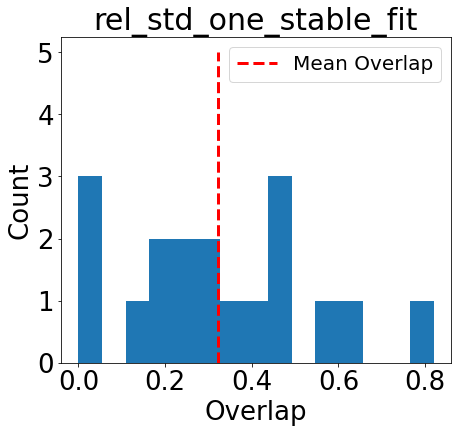

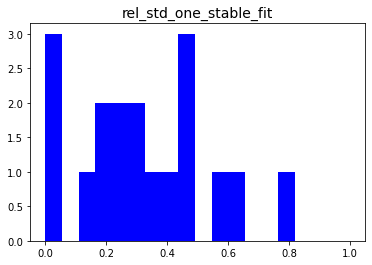

[0.3224443819329339,
 0.2156024973529634,
 0.299614339170184,
 [0.29689306436947416,
  0.23673259805234267,
  0.30233561397089387,
  0.2662255803395093,
  0.41693673227744976,
  0.18861583250015956,
  0.339224096092043,
  0.18993882139304752,
  0.6200748074344102,
  0.4520140647084548,
  0.44048045361399124,
  0.451585271374082,
  0.8195671386827956,
  0.6009887948970287,
  1.1881901667190026e-05,
  0.14062714066601226,
  5.177007109066299e-05,
  0.04169521244835854],
 ['A11_Post_Clean',
  'A12_Post_Clean',
  'A7_Post_Clean',
  'B8_Post_Clean',
  'C7_Post_Clean',
  'D12_Post_Clean_sonic_071621',
  'F12_Post_Clean_sonic_071621',
  'Gallagher_2020_Figure_S7a_Pink',
  'Katherinne_Requejo_2017_FigureS6A_Green',
  'Katherinne_Requejo_2017_FigureS6A_Red_same_spectrum_as_Katherinne_Requejo_2017_Figure_1A_Orange_3',
  'Katherinne_Requejo_2017_Figure_1A_Orange_3',
  'Katherinne_Requejo_2018_Figure_3A_Blue',
  'Katherinne_Requejo_2018_Figure_3A_Yellow',
  'Long Rod',
  'Wei_2021_Figure_3_Green',

In [6]:
test_spectra_obj.visualize_overlaps('rel_std_one_stable_fit')

In [7]:
def extract_uncertian_fits(fit_type, just_uncertian =  False):
    output_files = glob.glob('C:/Users/smgls/PycharmProjects/Data_Models_and_Spectra/Predictions/790 nm on processed/790 nm on not used/Fit Uncertian/*.joblib')
    if fit_type == 'rel_std': 
        output_files_for_analysis = []
        for file in output_files:
            output_file = joblib.load(file)
            if type(output_file) == list: 
                output_file_rel_std = output_file[1]
                output_file_rel_std.fit_description = '650 nm on len dia correlation rel std'
                # print(output_file_rel_std.name)
                # print(output_file_rel_std.fit_description)
                if 'Clean' in file or 'Rod' in file or 'nimbus' in file:
                    temp = output_file_rel_std.tabulate_results()[0][2]
                    true_values = []
                    temp_val = ''
                    for char in temp[11:len(temp)]:
                        if char not in '()':
                            temp_val += char
                        if char in '()':
                            true_values.append(float(temp_val))
                            temp_val = ''
                    output_file_rel_std.true_values = true_values
                    # print(output_file_rel_std.true_values)
                if output_file_rel_std.smoothed_spectrum[len(output_file_rel_std.smoothed_spectrum)-1] < 0.5:
                    # print(output_file_rel_std.smoothed_spectrum[len(output_file_rel_std.smoothed_spectrum)-1])
                    if 'Zhang_2021' not in file: 
                        smoothed_spectrum = savgol_filter(output_file_rel_std.inputted_spectrum, output_file_rel_std.smoothing_parameters[0], output_file_rel_std.smoothing_parameters[1])
                        inten_max = max(smoothed_spectrum)
                        peak_loc = list(smoothed_spectrum).index(inten_max)
                        wavelength_loc = output_file_rel_std.wavelengths[peak_loc]
                        
                        for name in size_df['Name']:
                            if name == output_file_rel_std.name: 
                                print(name)
                                true_vals = []
                                for column in size_df.columns[1:len(size_df.columns)]:
                                    true_vals.append(np.asarray(size_df.loc[(size_df["Name"]==name)][column])[0])
                                output_file_rel_std.true_values = true_vals
                                print(true_vals)
                        if wavelength_loc > 790+5:
                            if float(output_file_rel_std.true_values[2]) > 6: 
                                print(output_file_rel_std.name)
                                print(output_file_rel_std.true_values)
                                output_file_rel_std.tabulate_results()
                                print('passed filtering')
                                output_files_for_analysis.append(output_file_rel_std)

    if fit_type == 'normal': 
        output_files_for_analysis = []
        for file in output_files:
            output_file = joblib.load(file)
            if type(output_file) == list: 
                output_file_normal = output_file[2]
                output_file_normal.fit_description = '650 nm on len dia correlation'
                # print(output_file_rel_std.name)
                # print(output_file_rel_std.fit_description)
                if 'Clean' in file or 'Rod' in file or 'nimbus' in file:
                    temp = output_file_normal.tabulate_results()[0][2]
                    true_values = []
                    temp_val = ''
                    for char in temp[11:len(temp)]:
                        if char not in '()':
                            temp_val += char
                        if char in '()':
                            true_values.append(float(temp_val))
                            temp_val = ''
                    output_file_normal.true_values = true_values
                    # print(output_file_rel_std.true_values)
                if output_file_normal.smoothed_spectrum[len(output_file_normal.smoothed_spectrum)-1] < 0.5:
                    # print(output_file_rel_std.smoothed_spectrum[len(output_file_rel_std.smoothed_spectrum)-1])
                    if 'Zhang_2021' not in file: 
                        smoothed_spectrum = savgol_filter(output_file_normal.inputted_spectrum, output_file_normal.smoothing_parameters[0], output_file_normal.smoothing_parameters[1])
                        inten_max = max(smoothed_spectrum)
                        peak_loc = list(smoothed_spectrum).index(inten_max)
                        wavelength_loc = output_file_normal.wavelengths[peak_loc]
                        
                        for name in size_df['Name']:
                            if name == output_file_normal.name: 
                                print(name)
                                true_vals = []
                                for column in size_df.columns[1:len(size_df.columns)]:
                                    true_vals.append(np.asarray(size_df.loc[(size_df["Name"]==name)][column])[0])
                                output_file_normal.true_values = true_vals
                                print(true_vals)
                        if wavelength_loc > 790+5:
                            if float(output_file_normal.true_values[2]) > 6: 
                                print(output_file_normal.name)
                                print(output_file_normal.true_values)
                                output_file_normal.tabulate_results()
                                print('passed filtering')
                                output_files_for_analysis.append(output_file_normal)
    if just_uncertian == False: 
        test_spectra = joblib.load(str(790) + '_nm_on.joblib')
        for obj in test_spectra.output_objects:
            output_files_for_analysis.append(obj)

    test_spectra_obj = test_spectra_fit('790 nm on', 'all len dia correlation rel std, location' + 
                                            'still 650 for spectra where red edge doesnt go to the baseline', output_files_for_analysis)
        # joblib.dump(test_spectra_obj, str(cutoff) + '_nm_on.joblib')
        # summary_stats.append(test_spectra_obj.visualize_overlaps(str(cutoff)))
    return test_spectra_obj

In [8]:
all_fits_len_dia = extract_uncertian_fits('normal')
all_fits_rel_std = extract_uncertian_fits('rel_std')
all_fits_no_uncertian = joblib.load(str(790) + '_nm_on.joblib')

Gallagher_2020_Figure_S4a_Blue
[76.3, 6.4, 19.4, 2.0, 3.98, 0.56]
Gallagher_2020_Figure_S4a_Blue
[76.3, 6.4, 19.4, 2.0, 3.98, 0.56]
╒═════════════════════╤═══════════╤══════════════════════════════════════════════╕
│ Model Type          │ Overlap   │ Predictions 76.3(6.4) 19.4(2.0) 3.98(0.56)   │
╞═════════════════════╪═══════════╪══════════════════════════════════════════════╡
│ len_dia_correlation │ NA        │ 79.1(5.1) 20.2(2.0) 4.0(0.4)                 │
╘═════════════════════╧═══════════╧══════════════════════════════════════════════╛
passed filtering
Katherinne_Requejo_2018_Figure_3B_Blue
[37.38, 3.21, 6.93, 0.39, 5.4, 0.51]
Katherinne_Requejo_2018_Figure_3B_Blue
[37.38, 3.21, 6.93, 0.39, 5.4, 0.51]
╒═════════════════════╤═══════════╤════════════════════════════════════════════════╕
│ Model Type          │ Overlap   │ Predictions 37.38(3.21) 6.93(0.39) 5.4(0.51)   │
╞═════════════════════╪═══════════╪════════════════════════════════════════════════╡
│ len_dia_correlation │ NA   

Gallagher_2020_Figure_S4a_Blue
[76.3, 6.4, 19.4, 2.0, 3.98, 0.56]
Gallagher_2020_Figure_S4a_Blue
[76.3, 6.4, 19.4, 2.0, 3.98, 0.56]
╒═════════════════════════════╤═══════════╤══════════════════════════════════════════════╕
│ Model Type                  │ Overlap   │ Predictions 76.3(6.4) 19.4(2.0) 3.98(0.56)   │
╞═════════════════════════════╪═══════════╪══════════════════════════════════════════════╡
│ len_dia_correlation_rel_std │ NA        │ 40.6(3.3) 9.7(0.8) 4.2(0.4)                  │
╘═════════════════════════════╧═══════════╧══════════════════════════════════════════════╛
passed filtering
Katherinne_Requejo_2018_Figure_3B_Blue
[37.38, 3.21, 6.93, 0.39, 5.4, 0.51]
Katherinne_Requejo_2018_Figure_3B_Blue
[37.38, 3.21, 6.93, 0.39, 5.4, 0.51]
╒═════════════════════════════╤═══════════╤════════════════════════════════════════════════╕
│ Model Type                  │ Overlap   │ Predictions 37.38(3.21) 6.93(0.39) 5.4(0.51)   │
╞═════════════════════════════╪═══════════╪═══════════════

In [9]:
len_dia_only_uncertian = extract_uncertian_fits('normal', just_uncertian = True)
rel_std_only_uncertian = extract_uncertian_fits('rel_std', just_uncertian = True)

Gallagher_2020_Figure_S4a_Blue
[76.3, 6.4, 19.4, 2.0, 3.98, 0.56]
Gallagher_2020_Figure_S4a_Blue
[76.3, 6.4, 19.4, 2.0, 3.98, 0.56]
╒═════════════════════╤═══════════╤══════════════════════════════════════════════╕
│ Model Type          │ Overlap   │ Predictions 76.3(6.4) 19.4(2.0) 3.98(0.56)   │
╞═════════════════════╪═══════════╪══════════════════════════════════════════════╡
│ len_dia_correlation │ NA        │ 79.1(5.1) 20.2(2.0) 4.0(0.4)                 │
╘═════════════════════╧═══════════╧══════════════════════════════════════════════╛
passed filtering
Katherinne_Requejo_2018_Figure_3B_Blue
[37.38, 3.21, 6.93, 0.39, 5.4, 0.51]
Katherinne_Requejo_2018_Figure_3B_Blue
[37.38, 3.21, 6.93, 0.39, 5.4, 0.51]
╒═════════════════════╤═══════════╤════════════════════════════════════════════════╕
│ Model Type          │ Overlap   │ Predictions 37.38(3.21) 6.93(0.39) 5.4(0.51)   │
╞═════════════════════╪═══════════╪════════════════════════════════════════════════╡
│ len_dia_correlation │ NA   

Gallagher_2020_Figure_S4a_Blue
[76.3, 6.4, 19.4, 2.0, 3.98, 0.56]
Gallagher_2020_Figure_S4a_Blue
[76.3, 6.4, 19.4, 2.0, 3.98, 0.56]
╒═════════════════════════════╤═══════════╤══════════════════════════════════════════════╕
│ Model Type                  │ Overlap   │ Predictions 76.3(6.4) 19.4(2.0) 3.98(0.56)   │
╞═════════════════════════════╪═══════════╪══════════════════════════════════════════════╡
│ len_dia_correlation_rel_std │ NA        │ 40.6(3.3) 9.7(0.8) 4.2(0.4)                  │
╘═════════════════════════════╧═══════════╧══════════════════════════════════════════════╛
passed filtering
Katherinne_Requejo_2018_Figure_3B_Blue
[37.38, 3.21, 6.93, 0.39, 5.4, 0.51]
Katherinne_Requejo_2018_Figure_3B_Blue
[37.38, 3.21, 6.93, 0.39, 5.4, 0.51]
╒═════════════════════════════╤═══════════╤════════════════════════════════════════════════╕
│ Model Type                  │ Overlap   │ Predictions 37.38(3.21) 6.93(0.39) 5.4(0.51)   │
╞═════════════════════════════╪═══════════╪═══════════════

mean overlap = 0.28084650456643523
std overlap = 0.22186189194096076
median overlap = 0.2732159492610865


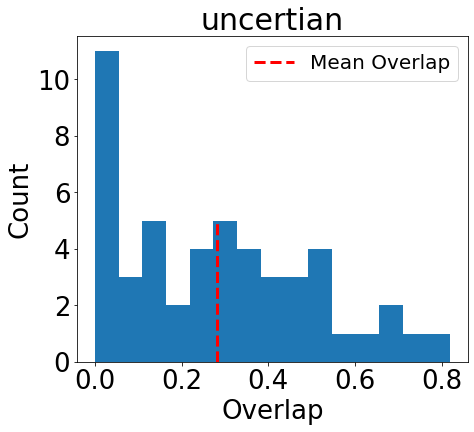

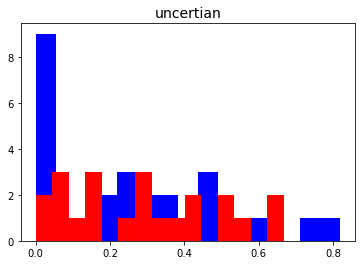

mean overlap = 0.2648642568209367
std overlap = 0.21447422078096975
median overlap = 0.2571570129182377


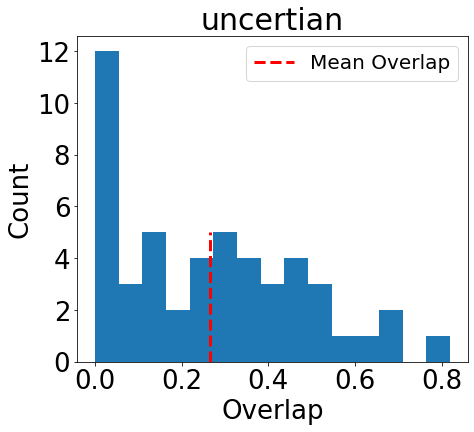

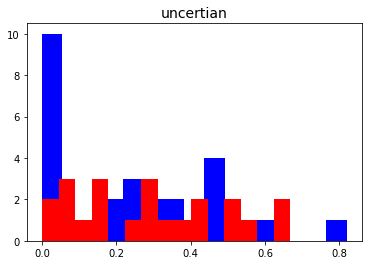

mean overlap = 0.30387387251080605
std overlap = 0.20239295314558467
median overlap = 0.2946689616564049


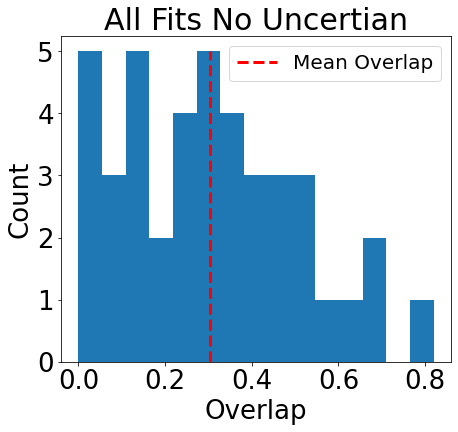

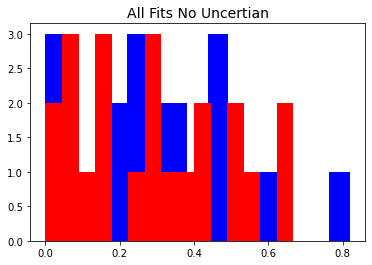

mean overlap = 0.15995282285848855
std overlap = 0.27420331780304585
median overlap = 0.0011982916483923107


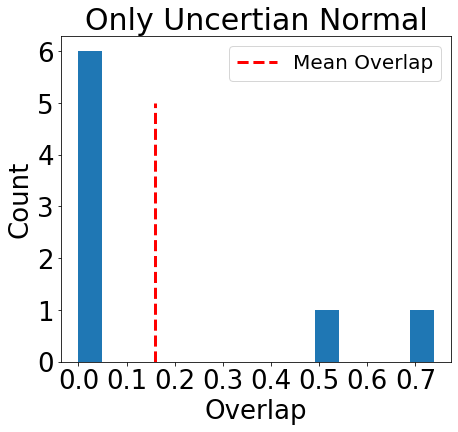

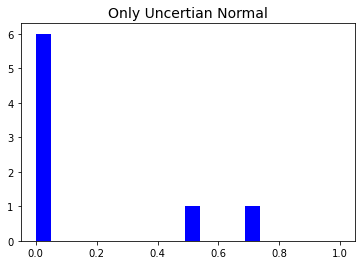

mean overlap = 0.060063774449122795
std overlap = 0.1500241852058266
median overlap = 2.2571878621190843e-05


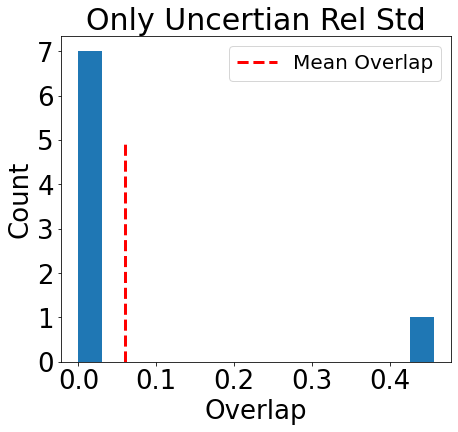

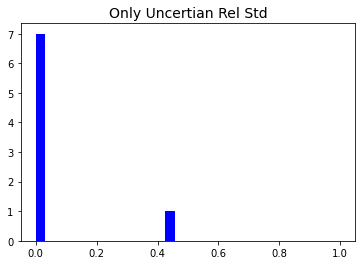

In [10]:
len_dia = all_fits_len_dia.visualize_overlaps('uncertian')
rel_std = all_fits_rel_std.visualize_overlaps('uncertian')
no_uncertian = all_fits_no_uncertian.visualize_overlaps('All Fits No Uncertian')

len_dia_only_uncertian_overlaps = len_dia_only_uncertian.visualize_overlaps('Only Uncertian Normal')
rel_std_only_uncertian_overlaps = rel_std_only_uncertian.visualize_overlaps('Only Uncertian Rel Std')

mean overlap = 0.30387387251080605
std overlap = 0.20239295314558467
median overlap = 0.2946689616564049


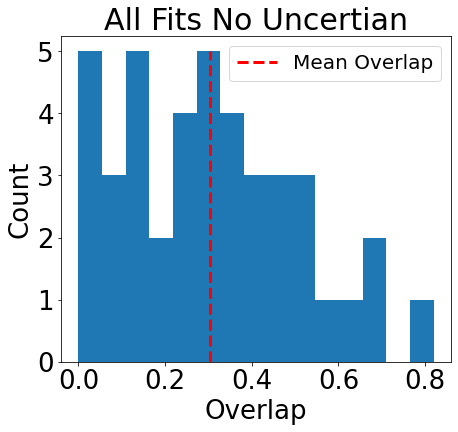

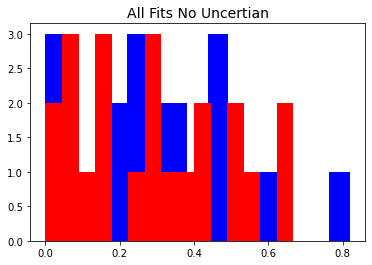

In [11]:
no_uncertian = all_fits_no_uncertian.visualize_overlaps('All Fits No Uncertian')

In [12]:
np.mean(no_uncertian[5])
# average overlap when baseline is unknown and the 650 nm ('blue cutoff') condition is used

0.32099212865731974

In [13]:
np.mean(no_uncertian[9])
# average overlap when baseline is unknown, 650 nm ('blue cutoff') condition is used and the model returns only one 
# stable fit when the relative standard deviation model is used 

0.3224443819329339

In [14]:
np.mean(no_uncertian[10])
# average overlap when baseline is unknown, 650 nm ('blue cutoff') condition is used and the model returns multiple  
# stable fits when the relative standard deviation model is used, but a re attempt with the more flexible model 
# returns only one stable fit

0.30792184917679233

In [15]:
np.mean(rel_std_only_uncertian_overlaps[5])
# average overlap when baseline is unknown, 650 nm ('blue cutoff') condition is used and the model returns multiple 
# stable fits when the relative standard deviation model is used 

0.060063774449122795

In [16]:
mean_len_dia_only_uncertian_overlaps
# average overlap when baseline is unknown, 650 nm ('blue cutoff') condition is used and the model returns multiple  
# stable fits when the relative standard deviation model is used and a re attempt with the more flexible model 
# also returns multiple stable fits

NameError: name 'mean_len_dia_only_uncertian_overlaps' is not defined

In [16]:
len_dia_only_uncertian.names

['Model Type',
 'Gallagher_2020_Figure_S4a_Blue',
 'Katherinne_Requejo_2018_Figure_3B_Blue',
 'Xingchen_Figure4_blue',
 'Xingchen_Figure4_green',
 'Xingchen_Figure4_orange',
 'Xingchen_Figure4_red',
 'Xingchen_Ye_2013_Figure_1H_Red',
 'Zhang_2014_Figure_S2_Teal']

In [19]:
output_files = glob.glob('C:/Users/smgls/PycharmProjects/Data_Models_and_Spectra/Predictions/790 nm on red cutoff processed/790 nm on red cutoff with true vals/*.joblib')

In [20]:
output_files_for_analysis = []
for file in output_files:
    output_file = joblib.load(file)
    if type(output_file) != list: 
        print(output_file.name)
        if 'Clean' in file or 'Rod' in file or 'nimbus' in file:
            temp = output_file.tabulate_results()[0][2]
            true_values = []
            temp_val = ''
            for char in temp[11:len(temp)]:
                if char not in '()':
                    temp_val += char
                if char in '()':
                    true_values.append(float(temp_val))
                    temp_val = ''
            output_file.true_values = true_values
            print(output_file.true_values)
        if output_file.smoothed_spectrum[len(output_file.smoothed_spectrum)-1] < 0.5:
            if 'Zhang_2021' not in file: 
                smoothed_spectrum = savgol_filter(output_file.inputted_spectrum, output_file.smoothing_parameters[0], output_file.smoothing_parameters[1])
                inten_max = max(smoothed_spectrum)
                peak_loc = list(smoothed_spectrum).index(inten_max)
                wavelength_loc = output_file.wavelengths[peak_loc]
                if wavelength_loc > 790:
                    try: 
                        if float(output_file.true_values[2]) > 6: 
                            print(output_file.name)
                            print(output_file.true_values)
                            print('passed filtering')
                            output_files_for_analysis.append(output_file)
                    except TypeError:
                        pass

A11_Post_Clean
len_dia_correlation
1.0000000000000004
╒═════════════════════╤═══════════╤═════════════════════════════════════════════╕
│ Model Type          │   Overlap │ Predictions 37.5(12.2) 10.2(2.8) 3.8(1.2)   │
╞═════════════════════╪═══════════╪═════════════════════════════════════════════╡
│ len_dia_correlation │  0.247396 │ 52.5(4.4) 10.2(1.8) 5.3(1.0)                │
╘═════════════════════╧═══════════╧═════════════════════════════════════════════╛
[37.5, 12.2, 10.2, 2.8, 3.8, 1.2]
A11_Post_Clean
[37.5, 12.2, 10.2, 2.8, 3.8, 1.2]
passed filtering
A12_Post_Clean
len_dia_correlation
1.0
╒═════════════════════╤═══════════╤═════════════════════════════════════════════╕
│ Model Type          │   Overlap │ Predictions 44.6(13.8) 12.0(3.9) 3.8(1.3)   │
╞═════════════════════╪═══════════╪═════════════════════════════════════════════╡
│ len_dia_correlation │  0.107632 │ 78.1(17.2) 13.6(4.6) 6.0(1.3)               │
╘═════════════════════╧═══════════╧══════════════════════════════════

In [21]:
red_cuttoff_no_baseline_info = test_spectra_fit('790 nm on', 'all len dia correlation rel std, location' + 
                                            '790 for spectra where red edge doesnt go to the baseline', output_files_for_analysis)

29
A11_Post_Clean
[52.47641893939798, 4.3603096289184915, 10.223778943669153, 1.813698892174757, 5.295741164551593, 1.0202139950103015]
A11_Post_Clean
[37.5, 12.2, 10.2, 2.8, 3.8, 1.2]
A12_Post_Clean
[78.11296175351366, 17.22518959600558, 13.594020776632346, 4.612170068730901, 6.0434005201945515, 1.3427324188745238]
A12_Post_Clean
[44.6, 13.8, 12.0, 3.9, 3.8, 1.3]
A7_Post_Clean
[72.25516615403498, 15.11731169144225, 14.425546588947013, 5.366242921912851, 5.420660599903296, 1.4571558503951831]
A7_Post_Clean
[36.8, 12.0, 11.9, 3.8, 3.2, 1.1]
B8_Post_Clean
[46.05824208708192, 5.424607157210973, 9.315937707674758, 1.5690907954769024, 5.089472258624023, 0.9998452843869043]
B8_Post_Clean
[37.1, 13.6, 10.6, 3.5, 3.5, 1.1]
C7_Post_Clean
[60.07162553855716, 15.053296867534554, 12.384282797948824, 4.447999883202345, 5.263035953469377, 1.3878783684129758]
C7_Post_Clean
[35.7, 13.9, 9.4, 2.8, 3.8, 1.2]
D12_Post_Clean_sonic_071621
[145.42248923337976, 20.023129525656408, 42.754263289382415, 2.68080

mean overlap = 0.10137620305214798
std overlap = 0.15370623477362771
median overlap = 0.000672511722093661


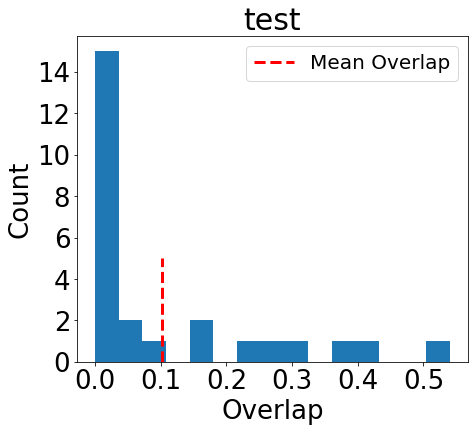

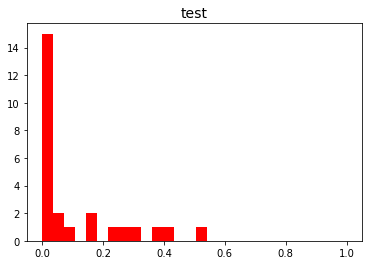

In [22]:
red_cutoff_no_baseline_overlaps = red_cuttoff_no_baseline_info.visualize_overlaps('test')

In [23]:
red_cutoff_no_baseline_overlaps[0]
# average overlap when baseline is unknown and the 790 nm ('red cutoff') condition is used

0.10137620305214798

In [24]:
mean_len_dia = len_dia[0]
mean_rel_std = rel_std[0]
mean_no_uncertian = no_uncertian[0]

overlaps_uncertianty = [mean_len_dia, mean_no_uncertian, mean_rel_std]

mean_len_dia_only_uncertian_overlaps = len_dia_only_uncertian_overlaps[0]
mean_rel_std_only_uncertian_overlaps = rel_std_only_uncertian_overlaps[0]

C:\Users\smgls\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


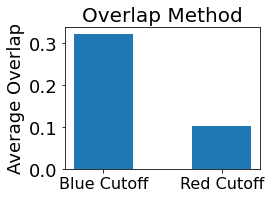

In [26]:
fig, ax = plt.subplots(figsize=(3.5, 2.6))
# variable_overlap_num_fit_color_normalized = [x / max(variable_overlap_num_fit) for x in variable_overlap_num_fit]
# my_cmap = plt.get_cmap("viridis")
# colors = my_cmap(variable_overlap_num_fit_color_normalized)
# sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(variable_overlap_num_fit)))

# sm.set_array([])

# cbar = plt.colorbar(sm)
# cbar.set_label('Num Spectra Fit', fontsize = 22, rotation=270,labelpad=25)
# cbar.ax.tick_params(labelsize=20)

ax.set_title('Overlap Method', fontsize = 20)
ax.bar(['Blue Cutoff', 'Red Cutoff'], [np.mean(no_uncertian[5]), red_cutoff_no_baseline_overlaps[0]] , width = 0.5)
ax.set_xticklabels(['Blue Cutoff', 'Red Cutoff'], rotation = 0)
ax.set_ylabel('Average Overlap', fontsize = 18, color = 'k')
ax.tick_params(axis='y', labelcolor='k', labelsize= 18)
# ax.set_xlabel('Cutoff Wavelength (nm)', fontsize = 18)
ax.tick_params(axis='x', labelcolor='k', labelsize= 16)
ax.set_yticks([0.0, 0.1, 0.2, 0.3])
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.savefig('Fig_3_overlap_vs_cutoff_type.pdf', bbox_inches = 'tight', transparent = True)
plt.show()

C:\Users\smgls\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


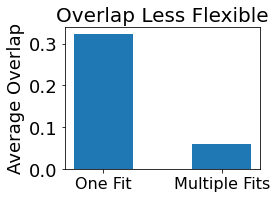

In [27]:
fig, ax = plt.subplots(figsize=(3.5, 2.6))
# variable_overlap_num_fit_color_normalized = [x / max(variable_overlap_num_fit) for x in variable_overlap_num_fit]
# my_cmap = plt.get_cmap("viridis")
# colors = my_cmap(variable_overlap_num_fit_color_normalized)
# sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(variable_overlap_num_fit)))

# sm.set_array([])

# cbar = plt.colorbar(sm)
# cbar.set_label('Num Spectra Fit', fontsize = 22, rotation=270,labelpad=25)
# cbar.ax.tick_params(labelsize=20)

ax.set_title('Overlap Less Flexible', fontsize = 20)
ax.bar(['Rel Std', 'Only Uncertian Samples'], [np.mean(no_uncertian[9]), mean_rel_std_only_uncertian_overlaps] , width = 0.5)
ax.set_xticklabels(['One Fit', 'Multiple Fits'], rotation = 0)
ax.set_ylabel('Average Overlap', fontsize = 18, color = 'k')
ax.tick_params(axis='y', labelcolor='k', labelsize= 18)
# ax.set_xlabel('Cutoff Wavelength (nm)', fontsize = 18)
ax.tick_params(axis='x', labelcolor='k', labelsize= 16)
ax.set_yticks([0.0, 0.1, 0.2, 0.3])
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.savefig('Fig_3_overlap_vs_fit_uncertianty.pdf', bbox_inches = 'tight', transparent = True)
plt.show()

C:\Users\smgls\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


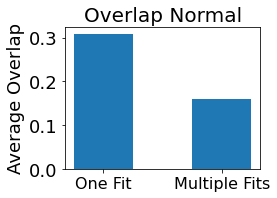

In [28]:
fig, ax = plt.subplots(figsize=(3.5, 2.6))
# variable_overlap_num_fit_color_normalized = [x / max(variable_overlap_num_fit) for x in variable_overlap_num_fit]
# my_cmap = plt.get_cmap("viridis")
# colors = my_cmap(variable_overlap_num_fit_color_normalized)
# sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(variable_overlap_num_fit)))

# sm.set_array([])

# cbar = plt.colorbar(sm)
# cbar.set_label('Num Spectra Fit', fontsize = 22, rotation=270,labelpad=25)
# cbar.ax.tick_params(labelsize=20)

ax.set_title('Overlap Normal', fontsize = 20)
ax.bar(['Rel Std', 'Only Uncertian Samples'], [np.mean(no_uncertian[10]), mean_len_dia_only_uncertian_overlaps] , width = 0.5)
ax.set_xticklabels(['One Fit', 'Multiple Fits'], rotation = 0)
ax.set_ylabel('Average Overlap', fontsize = 18, color = 'k')
ax.tick_params(axis='y', labelcolor='k', labelsize= 18)
# ax.set_xlabel('Cutoff Wavelength (nm)', fontsize = 18)
ax.tick_params(axis='x', labelcolor='k', labelsize= 16)
ax.set_yticks([0.0, 0.1, 0.2, 0.3])
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.savefig('Fig_3_overlap_vs_fit_uncertianty_two.pdf', bbox_inches = 'tight', transparent = True)
plt.show()